In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set()
mobil_data = pd.read_csv("C:/users/omer/Desktop/train.csv")
type(mobil_data)

pandas.core.frame.DataFrame

In [2]:
mobil_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
mobil_data.tail(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [45]:
mobil_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [24]:
mobil_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
print("Eğitim veri kümesinin şekli :",mobil_data.shape) # Eğitim veri kümesi şekli

Eğitim veri kümesinin şekli : (2000, 21)


In [5]:
mobil_data.isnull().sum() # eğitim veri kümesi için boş değerlerin kontrol edilmesi

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [28]:
corr = mobil_data.corr()
corr.shape

(21, 21)

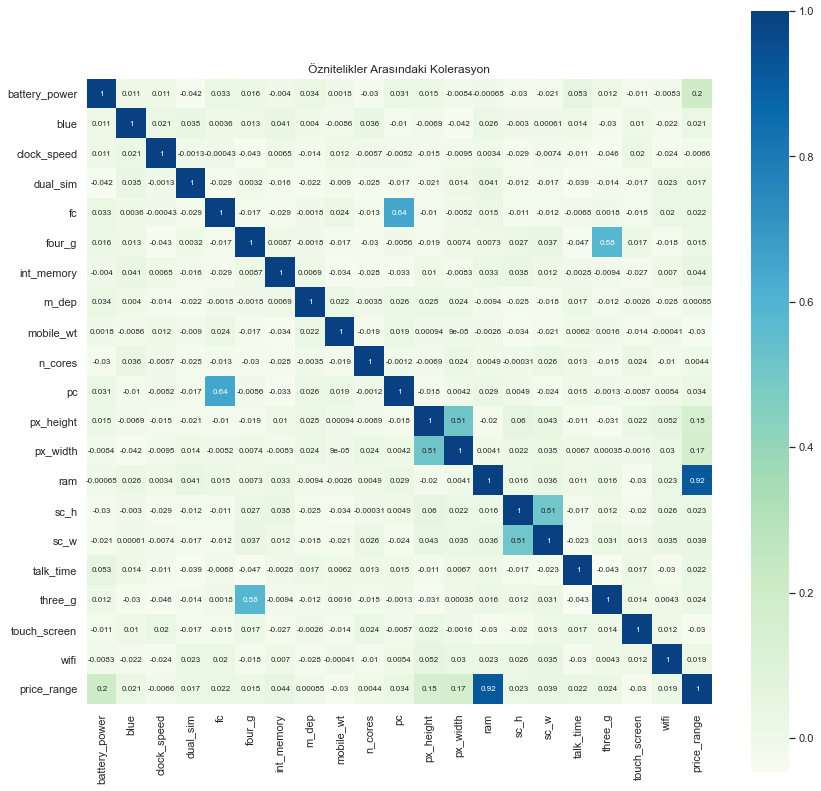

In [35]:
fig = plt.subplots (figsize = (14, 14))
sns.heatmap(mobil_data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Öznitelikler Arasındaki Kolerasyon')
plt.show ()

<AxesSubplot:>

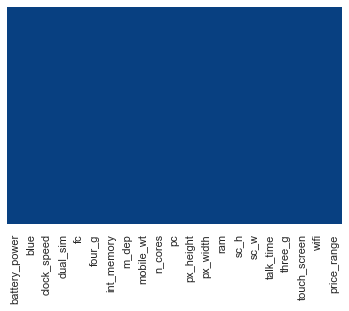

In [38]:
sns.heatmap(mobil_data.isnull(),yticklabels=False,cbar=False,cmap='GnBu_r') #Isı haritasını kullanarak boş değerleri kontrol etme

In [46]:
x=mobil_data.iloc[:,:-1].values
y=mobil_data.iloc[:,-1].values
x=StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.20,random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression
Ireg =LogisticRegression()
Ireg.fit(x_train, y_train)

LogisticRegression()

In [49]:
y_pred =Ireg.predict(x_test)
print(y_pred)

[3 0 2 2 3 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 2 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 2 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 3 0 1 3 0 2 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0]


In [50]:
(unique,counts) = np.unique(y_pred,return_counts=True)
price_range = np.asarray((unique,counts)).T
print(price_range)

[[  0  95]
 [  1  90]
 [  2  97]
 [  3 118]]


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 93   2   0   0]
 [  2  85   5   0]
 [  0   3  91   5]
 [  0   0   1 113]]
0.955


In [52]:
accuracy = accuracy_score(y_test,y_pred) * 100
print("Accuracy of the Logistic Regression model :",accuracy)

Accuracy of the Logistic Regression model : 95.5
